In [1]:
import numpy as np
import sklearn.datasets as datasets

In [2]:
x, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=20,
                                      coef=True, random_state=0)

In [3]:
x = x[:,0]

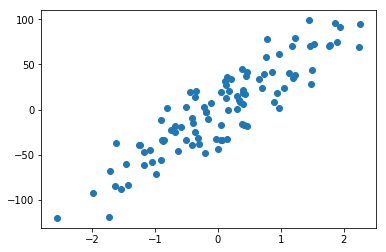

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y);

In [21]:
class regressao():
    
    def __init__(self,learning_rate = 0.01, num_iterations = 50, b0 = 0, b1 = 0):
        self.X = []
        self.y = []
        self.learning_rate = learning_rate 
        self.num_iterations = num_iterations
        self.b0 = b0
        self.b1 = b1
    
    def compute_error_for_line_given_points(self,b0,b1,x,y):
        N = len(y)
        totalError = (1/N)*np.sum((y-(x*b1+b0))**2)
        return totalError
    
    def step_gradient(self,b0_current, b1_current, x,y, learning_rate):
        N = len(y)
        b0_grad = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
        b1_grad = 2/N * np.sum(-x * (y - ((b1_current * x)+ b0_current)))
        new_b0 = b0_current - (learning_rate*b0_grad)
        new_b1 = b1_current - (learning_rate*b1_grad)
        return new_b0, new_b1
    
    def gradient_descent_runner(self,x,y,b0,b1,learning_rate, num_iterations):
        for _ in range(num_iterations):
            b0, b1 = step_gradient(b0,b1,x,y,learning_rate)
        return b0, b1
    
    def fit(self,X,y):
        self.X = X
        self.y = y
    
    def predict(self,X):
        b0, b1 = gradient_descent_runner(self.X,self.y,self.b0,self.b1,0.01,500)
        return b0 + b1*X
        

In [5]:
def compute_error_for_line_given_points(b0,b1,x,y):
    N = len(y)
    totalError = (1/N)*np.sum((y-(x*b1+b0))**2)
    return totalError

In [6]:
def step_gradient(b0_current, b1_current, x,y, learning_rate):
    N = len(y)
    b0_grad = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_grad = 2/N * np.sum(-x * (y - ((b1_current * x)+ b0_current)))
    new_b0 = b0_current - (learning_rate*b0_grad)
    new_b1 = b1_current - (learning_rate*b1_grad)
    return new_b0, new_b1

In [7]:
def gradient_descent_runner(x,y,b0,b1,learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0,b1,x,y,learning_rate)
    return b0, b1

In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
import seaborn as sns

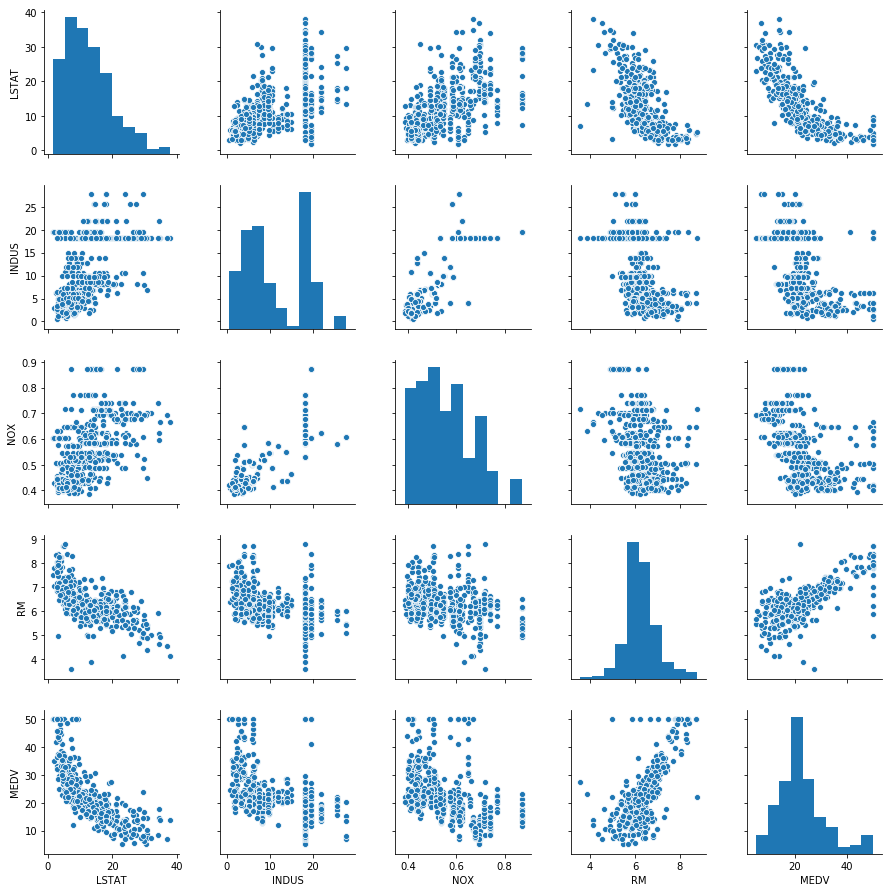

In [10]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

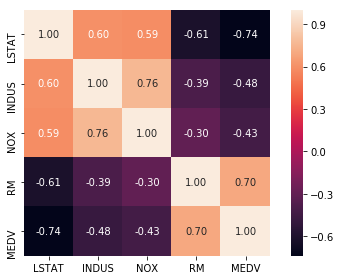

In [11]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [12]:
#funçao para plotar o resultado
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

In [117]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [128]:
X = df['RM'].values
y = df['MEDV'].values

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

In [130]:
modelRL = regressao(learning_rate=0.01,num_iterations=1500)

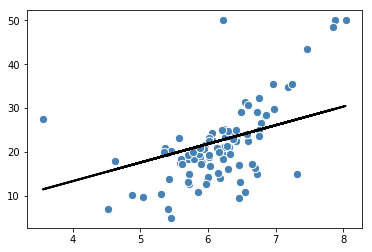

In [131]:
modelRL.fit(X_train,y_train)
lin_regplot(X_test, y_test, modelRL)

In [132]:
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [133]:
X = df[['RM']].values
y = df['MEDV'].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

In [135]:
modelSKL = SGDRegressor(max_iter=1500,tol=0.01)

In [136]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

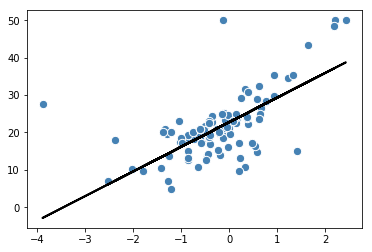

In [137]:
modelSKL.fit(X_train_std,y_train)
lin_regplot(X_test_std, y_test, modelSKL)

In [237]:
import metrics
from sklearn import metrics as metrics_skl
from importlib import reload
reload(metrics)

<module 'metrics' from '/home/michel/Documentos/Mineracao-de-Dados/Exercicios/Lista 6 - Regressao/metrics.py'>

In [238]:
metric = metrics.Meticas()

In [239]:
modelSKL = SGDRegressor(max_iter=1500,tol=0.01)
modelSKL.fit(X_train_std,y_train)
pred = modelSKL.predict(X_test_std)
metric.mae(y_test,pred)

4.478435163403262

In [240]:
erros_imple = []
erros_skleran = []
label = ['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','Mean squared logarithmic error','Root Mean squared logarithmic error']

In [241]:
erros_imple.append(metric.mae(y_test,pred))
erros_imple.append(metric.mse(y_test,pred))
erros_imple.append(metric.rmse(y_test,pred))
erros_imple.append(metric.msle(y_test,np.absolute(pred)))
erros_imple.append(metric.rmsle(y_test,np.absolute(pred)))

In [242]:
erros_skleran.append(metrics_skl.mean_absolute_error(y_test,pred))
erros_skleran.append(metrics_skl.mean_squared_error(y_test,pred))
erros_skleran.append(metrics_skl.mean_squared_error(y_test,pred) ** 0.5)
erros_skleran.append(metrics_skl.mean_squared_log_error(y_test,np.absolute(pred)))
erros_skleran.append(metrics_skl.mean_squared_log_error(y_test,np.absolute(pred)) ** 0.5)

In [247]:
erros = {'Metrica': label, 'Implementacao': erros_imple, 'Sklearn': erros_skleran}

In [248]:
pd.DataFrame(erros)

,Metrica,Implementacao,Sklearn
0,Mean Absolute Error,4.478435,4.478435
1,Mean Squared Error,46.142836,46.142836
2,Root Mean Squared Error,6.792852,6.792852
3,Mean squared logarithmic error,0.123030,0.123030
4,Root Mean squared logarithmic error,0.350756,0.350756
